In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.DataFrame(np.random.randint(0,80,size=(100, 2)), columns=list('xy'))

In [13]:
k = 3
np.random.seed(10)
centroid = {i+1:[np.random.randint(0,80), np.random.randint(0,80)] for i in range(k)}
print("initial centroid", centroid)
old_centorid = {}

initial centroid {1: [9, 15], 2: [64, 28], 3: [29, 8]}


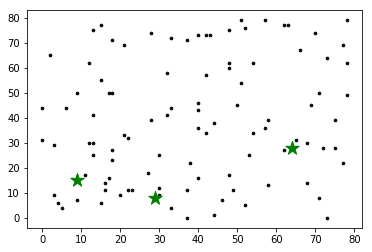

In [14]:
plt.scatter(df['x'], df['y'], c='#050505', s=7)
for i in centroid.keys():
    plt.scatter(centroid[i][0], centroid[i][1], marker='*', s=200, c='g')
plt.show()

In [15]:

while (old_centorid != centroid):
    distance_list = []
    for i in centroid.keys():
        distance_list.append((np.sqrt( ((df['x']- centroid[i][0]) ** 2) + ((df['y']- centroid[i][1]) ** 2))))

    distance = np.vstack(distance_list)
    clusters = np.argmin(distance, axis=0)
    temp = centroid.copy()
    df['clusters'] = clusters
    adc = df.groupby('clusters').mean()
    d = adc.to_dict('split')
    centroid[1] = d['data'][0]
    centroid[2] = d['data'][1]
    centroid[3] = d['data'][2]
    if (temp == centroid):
        old_centorid = centroid

In [16]:
color = {0:'r', 1:'g', 2:'b'}
df['color'] = df['clusters'].map(lambda x: color[x])

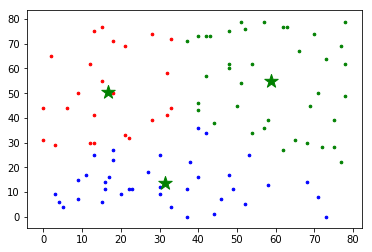

In [17]:
for i in range(100):
    plt.scatter(df['x'][i], df['y'][i], c=df['color'][i], s=7)
for i in centroid.keys():
    plt.scatter(centroid[i][0], centroid[i][1], marker='*', s=200, c='g')
plt.show()